# Effect of Income Range of Prosper Loans

## by Sheiyohn Arunthavanathan

## Investigation Overview

> In this investigation, I wanted to see how a borrower's income range relates to the Prosper loan in terms of APR, Loan amount, rating and loan payments as well as to see any trends in the APR and average loan amount between time period 2006-2014.

## Dataset Overview

> The data set has 113,066 records of propser loan listing. Each record has 82 variables describing about the loan, borrower and investor. Some data wrangling was performed to removed duplicated data and some outliers.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
#reading the loan prosper data
df = pd.read_csv('prosperLoanData.csv')

#changing the display to show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

In [5]:
#setting all date columns to datetime objects
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df.DateCreditPulled = pd.to_datetime(df.DateCreditPulled)
df.FirstRecordedCreditLine = pd.to_datetime(df.FirstRecordedCreditLine)
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)

#cleaning column names
df.columns = df.columns.str.replace(" ","")
df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")

#mapping the Listing Category keys to their string value
df["ListingCategoryName"] = df.ListingCategorynumeric.map({0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure", 11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"})


In [6]:
#classifying income range as an ordered category
income_range= ['Unemployed',"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+" ]
incomeclasses = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df.IncomeRange=df.IncomeRange.astype(incomeclasses)

#categorizing the Prosper Loan Rating 
rating= ['HR',"E", "D", "C", "B", "A", "AA"]
ratingclasses = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
df.ProsperRatingAlpha=df.ProsperRatingAlpha.astype(ratingclasses)

In [7]:
#checking for any duplicated listings and dropping them
df.drop(index = df[df.ListingKey.duplicated()].index, inplace=True)
#removing outliers
df=df[df.LoanOriginalAmount<25000]
df = df[df.StatedMonthlyIncome <70000]
df = df[df.BorrowerAPR <0.44]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Amount

> The Propser Loan amount across the 8 years has large rane from USD 1000 to USD 26,000. However, we see a multi-modal distribution with peaks at USD4467, USD15,500 and USD11,000

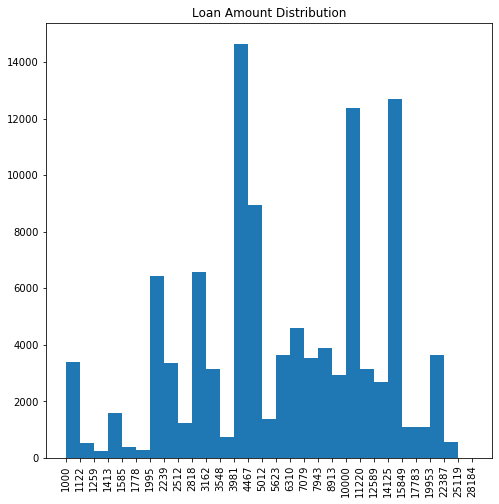

In [6]:
#plotting the distribution of Loan Amount
loanlog = np.log10(df.LoanOriginalAmount)

plt.figure(figsize=[8,8])
bins= np.arange(loanlog.min(), loanlog.max()+0.1, 0.05)
plt.hist(x = loanlog, bins=bins)
#sb.histplot(x = loanlog, bins=bins)
ticks_bin=list(10**bins)
labels=['{:0.0f}'.format(i) for i in ticks_bin]
plt.xticks(bins,labels, rotation=90)
plt.title("Loan Amount Distribution");

## Distribution of Borrowers APR

The distribution of APR is also multi-modal, however the distribution shows some symmetry where it peaks at 0.2 and have other distinct peaks at 0.29-0.3 and 0.37.

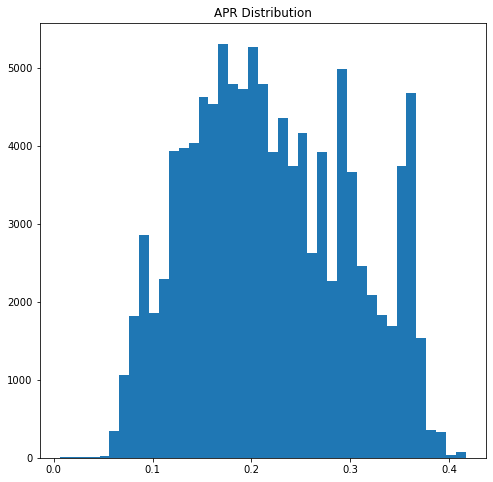

In [7]:
#plotting the distribution of borrower APR
plt.figure(figsize=[8,8])
bin_edges = np.arange(0.006530,0.423950,0.01)
plt.hist(data = df, x='BorrowerAPR', bins = bin_edges)
plt.title('APR Distribution');

## Distribution of Monthly Income

The general Prosper Loan borrower's monthly income seem to populate between USD20,000 to 75,000. It also identified that people with higher income are less likely to take Prosper Loans.

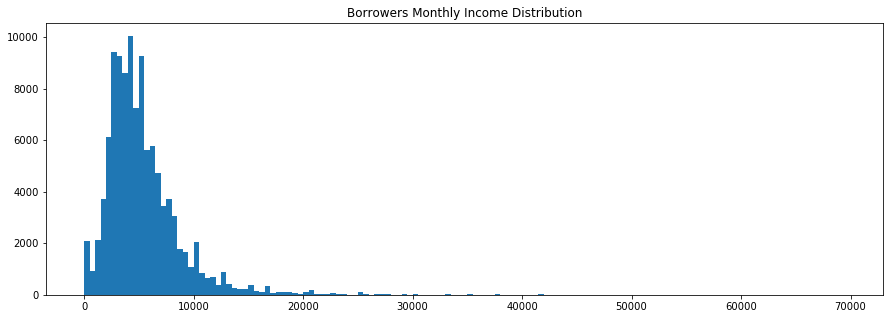

In [8]:
bin_edges = np.arange(0.0,70000,500)
plt.figure(figsize =[15,5])
plt.hist(data = df, x='StatedMonthlyIncome', bins = bin_edges)
plt.title('Borrowers Monthly Income Distribution');

## Changes in Borrowers APR over Time

We see sharp increase in the first 3 quarters of year 2006, and the APR started to slowly risde to its peak of 0.27 on year 2011, after which it started to lower levels at a rapid rate.

Text(0.5,1,'Borrower APR Over the Past 8 Years')

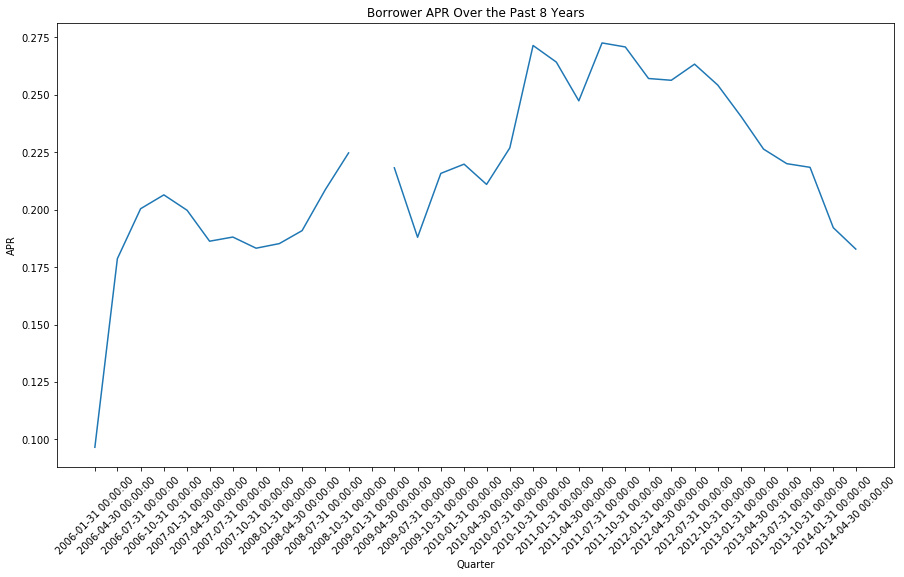

In [9]:
#setting quarterly time frequency
quarterly = df.set_index("ListingCreationDate").resample('Q-JAN', convention='end')['BorrowerAPR'].mean()
plt.figure(figsize=[15,18])
plt.subplot(2,1,1)
plt.plot(quarterly.index, quarterly)
plt.xticks(quarterly.index, list(quarterly.index), rotation=45);
plt.ylabel('APR')
plt.xlabel('Quarter')
plt.title('Borrower APR Over the Past 8 Years')

In [10]:
#amending incomes not displaying based on stated monthly income
df['AnnualSalary'] = df["StatedMonthlyIncome"]*12


def calc(i):
    if i > 99999:
        return  '$100,000+'
    elif i>75000 and i<=99999:
        return '$75,000-99,999'
    elif i>50000 and i<=74999:
        return "$50,000-74,999"
    elif i>25000 and i<=50000:
        return "$25,000-49,999"
    elif i>0 and i<=24999:
        return "$1-24,999"
    else:
        return "Unemployed"

df['IncomeRange'] = df['AnnualSalary'].apply(calc)

## Comparing Loan Amount to Income Range

We notice that the Borrowers APR decreases as the income range increases, this is clearly visible in the downward trend of the median value. With regards to unemployed people, the APR is similar to the borrowers with income range USD25000 - USD4999 which is lower than the borrowers earning USD1 - USD24999. We can also confirm that the borrower APR is concentrated between 1.8 to 2.8.

We have noticed that borrowers who are earning income have a higher loan amount with a higher income range. It is also interesting to note that the loan amount taken by the unemployed exceeds the borrower with the lowest income range.

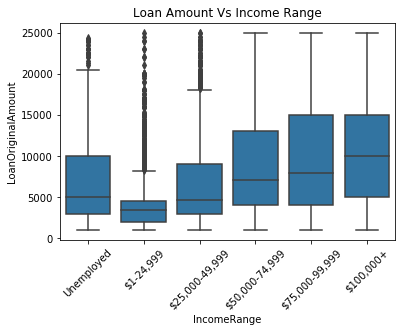

In [11]:
#classifying income range as an ordered category
income_range= ['Unemployed',"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+" ]
incomeclasses = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df.IncomeRange=df.IncomeRange.astype(incomeclasses)

sb.boxplot(x=df.IncomeRange, y =df.LoanOriginalAmount, color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Loan Amount Vs Income Range');

## Comparing Borrower APR to Income Range

As income range increases, the Borrowers APR decreases show inverse relationship. Borrowers who are specified to be unemployed enjoy lower APR rates compared to borrowers in the lowest income range. Also, we can notice that most APR is concentrated between 0.18 and 0.3

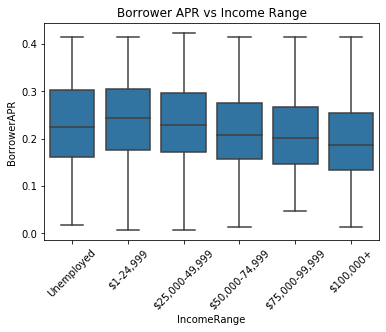

In [12]:
sb.boxplot(x=df.IncomeRange, y =df.BorrowerAPR, color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Borrower APR vs Income Range');

## Comparing Monthly Loan Payment to Income Range

As the income range increases, the monthly loan payments more evenly distributed from top to bottom, showing that as income increases the montly loan payment amount also increases.

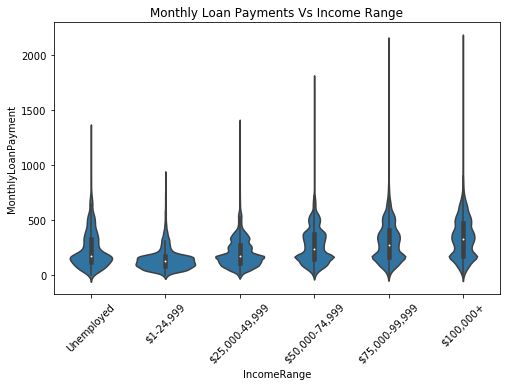

In [13]:
plt.figure(figsize=[8,5])
sb.violinplot(x=df.IncomeRange, y =df.MonthlyLoanPayment, color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Monthly Loan Payments Vs Income Range');

## Verifiable Income to Borrower APR

Unverifiable borrowers for income tend to have a much higher APR than verifiable borrowers, however we identified that verified borrowers in the income range USD 1-24,999 have a higher APR than unemployed people and have a similar rate to unverifiable higher income borrowers. Also, it is key to note that unverifiable borrowers have a higher APR than verifiable borrowers.

Text(0.5,1,'APR VS Verifiable Income')

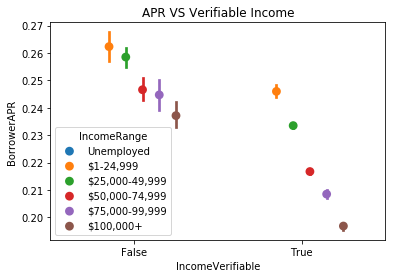

In [10]:
sb.pointplot(data = df, x = 'IncomeVerifiable', y = 'BorrowerAPR', hue = 'IncomeRange', linestyles="", dodge=0.5, )
plt.title('APR VS Verifiable Income')

## Quarterly Average Loan Amount Listed

Loan amount listed between year 2006 to year 2008 slowly rose but sharply dropped in the year 2008-2009. After 2009, the loan amount listing started rising at a linear scale.

Text(0.5, 1.0, 'Quarterly Average Loan Amount Based on Income Range ')

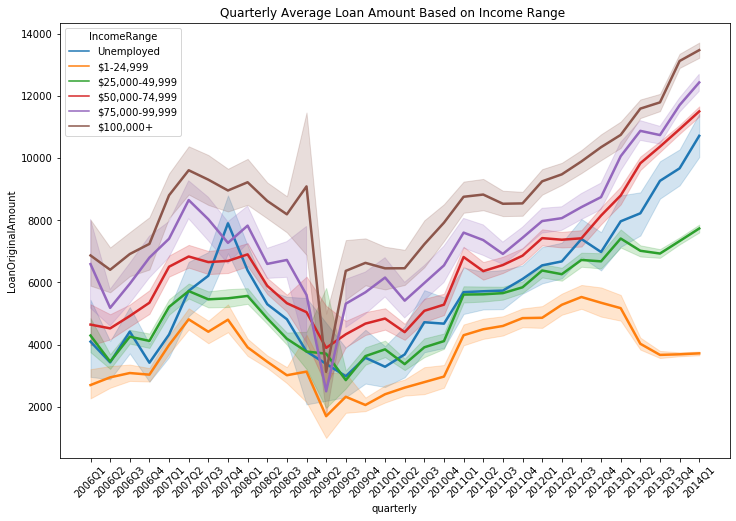

In [16]:
#fig, ax = plt.subplots()
#df.groupby("logic").plot(x="n_index", y="value", marker="o", ax=ax)
#ax.legend(["False","True"])

data = df[['ListingCreationDate', 'IncomeRange', 'LoanOriginalAmount']]
data['quarterly'] =data.ListingCreationDate.dt.to_period('Q')
data.quarterly = data.quarterly.astype(str)
data =data.sort_values("quarterly")

plt.figure(figsize=[12,8])
sb.lineplot('quarterly', 'LoanOriginalAmount', hue='IncomeRange', linewidth=2.5, data=data) 

#plt.plot('quarterly', 'LoanOriginalAmount', hue='IncomeRange', linewidth=2.5, data=data) 
plt.xticks(rotation=45);
plt.title("Quarterly Average Loan Amount Based on Income Range ")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!